# Main Dashboard of PhD experiments in pre silicon

In [1]:
%matplotlib inline
results_file = 'presilicon_results.csv'
import os
#from pca.analytics import *
from pca.pca import *
from pre_silicon.presi_data_gen import *
from clustering.distortion import *
from clustering.clustering import *
from clustering.cluster_score import *

# Characterization of worklaods based on instructions kind

1.0
1.0
1.0
1.0000000000000002
1.0
0.9999999999999999
1.0
1.0
1.0


,arithmetic,branch,store,load,vector,io,other
intrate_gcc_v105,0.183897,0.280865,0.325338,0.054323,0.016464,0.000012,0.139101
fpspeed_gcc_v110,0.204898,0.203147,0.294539,0.032434,0.002837,0.000121,0.262024
intspeed_gcc_v110,0.105898,0.300718,0.394048,0.049527,0.003753,0.000237,0.145820
intspeed_gcc_v118,0.171282,0.281759,0.321231,0.050460,0.001331,0.000032,0.173904
intspeed_gcc_v105,0.176634,0.283480,0.330749,0.053279,0.015324,0.000035,0.140500
intrate_gcc_v110,0.191304,0.278999,0.309939,0.055921,0.001209,0.000015,0.162614
fprate_gcc_v110,0.082881,0.141344,0.170890,0.030564,0.103727,0.000016,0.470577
intrate_gcc_v118,0.179724,0.279458,0.320783,0.049195,0.002023,0.000016,0.168801
fprate_gcc_v118,0.099880,0.264354,0.372410,0.029058,0.002147,0.000105,0.232047


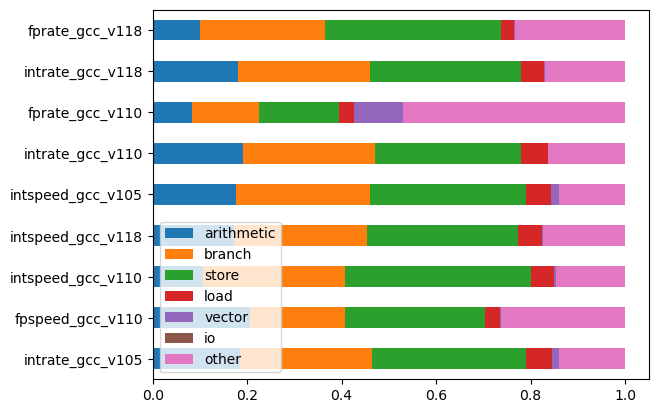

,test_name,arithmetic,branch,store,load,vector,io,other
0,intrate_gcc_v105,0.183897,0.280865,0.325338,0.054323,0.016464,0.000012,0.139101
1,fpspeed_gcc_v110,0.204898,0.203147,0.294539,0.032434,0.002837,0.000121,0.262024
2,intspeed_gcc_v110,0.105898,0.300718,0.394048,0.049527,0.003753,0.000237,0.145820
3,intspeed_gcc_v118,0.171282,0.281759,0.321231,0.050460,0.001331,0.000032,0.173904
4,intspeed_gcc_v105,0.176634,0.283480,0.330749,0.053279,0.015324,0.000035,0.140500
5,intrate_gcc_v110,0.191304,0.278999,0.309939,0.055921,0.001209,0.000015,0.162614
6,fprate_gcc_v110,0.082881,0.141344,0.170890,0.030564,0.103727,0.000016,0.470577
7,intrate_gcc_v118,0.179724,0.279458,0.320783,0.049195,0.002023,0.000016,0.168801
8,fprate_gcc_v118,0.099880,0.264354,0.372410,0.029058,0.002147,0.000105,0.232047


In [2]:
files = dir_list = os.listdir("tests/pre_silicon_runs")
my_labels = ['arithmetic', 'branch', 'store', 'load', 'vector' , 'io', 'other']
df_global = pd.DataFrame(columns=my_labels)
for file_name in files:
    if "icc" not in file_name:
        test_name = file_name
        df = read_histogram(os.path.join("tests/pre_silicon_runs",file_name))
        df_sumary = calcualte_values(df)
        df_global.loc[test_name] = df_sumary['probability'].values.tolist()

display(df_global)
plot_stacked_bar(df_global)

df_global.reset_index(inplace=True)
df_global = df_global.rename(columns={"index": "test_name"} )

display(df_global)

df_global.to_csv("presilicon_results.csv")

## PCA

In [3]:


df = df_global

df_ = df.loc[:, df.columns != 'test_name']
df_ = (df_-df_.min())/(df_.max()-df_.min())
extracted_col = df["test_name"]
df_.insert(0, 'test_name', extracted_col)
df_.set_index('test_name')
df_.to_csv('normalized_df.csv')
df = df_

features = list(df.columns)[1:]
test_column = list(df.columns)[0]

pca_df = get_PCA(df,features)



## Explained Variance

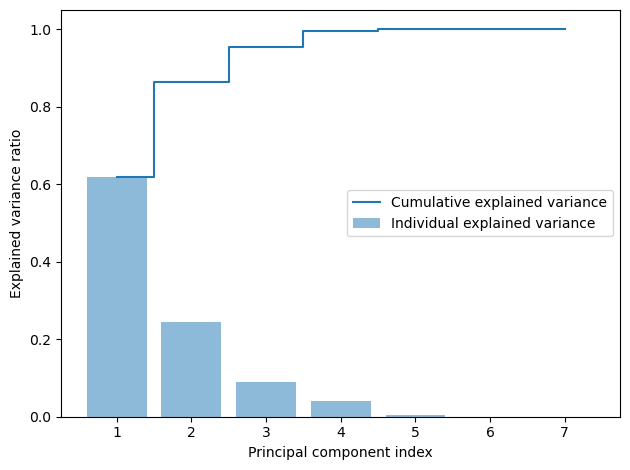

In [4]:
from pca.pca import *
x = get_features(df_global,features)
X_std = StandardScaler().fit_transform(x)
exp_var_pca = get_explained_variance(X_std)
plot_explained_variance(exp_var_pca)

,principal component 1,principal component 2,test_name
0,-1.051738,-1.125993,intrate_gcc_v105
1,0.764839,0.288589,fpspeed_gcc_v110
2,-1.541309,2.588356,intspeed_gcc_v110
3,-0.898324,-0.611689,intspeed_gcc_v118
4,-1.075194,-0.750206,intspeed_gcc_v105
5,-1.127502,-1.281217,intrate_gcc_v110
6,5.559998,-0.256928,fprate_gcc_v110
7,-0.873896,-0.835205,intrate_gcc_v118
8,0.243125,1.984294,fprate_gcc_v118


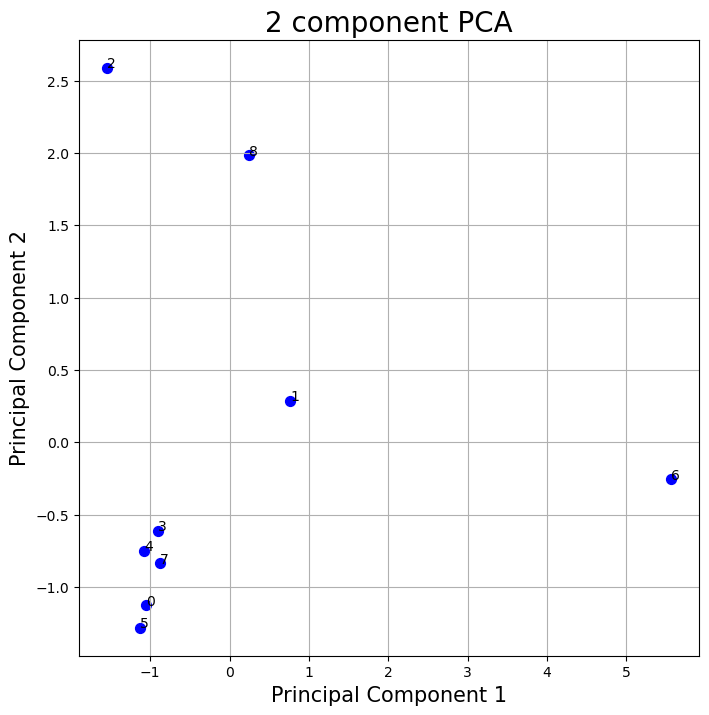

In [5]:
from pca.pca import *
display(pca_df)
plot_PCA(pca_df)

# Plot characteristics of the worklaods

'Optimal number of clusters = 4'

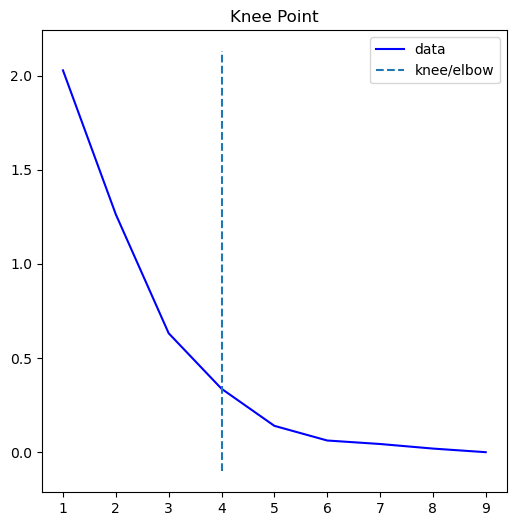

In [6]:
from clustering.distortion import *
from clustering.cluster_score import *
clusters,distortions,inertias = calculate_elbow(pca_df)
display(f"Optimal number of clusters = {clusters}")

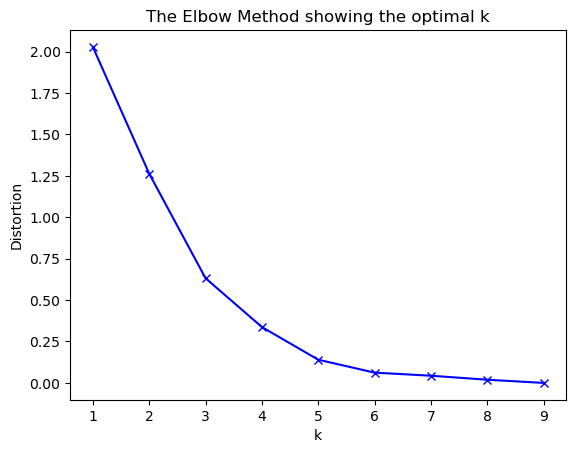

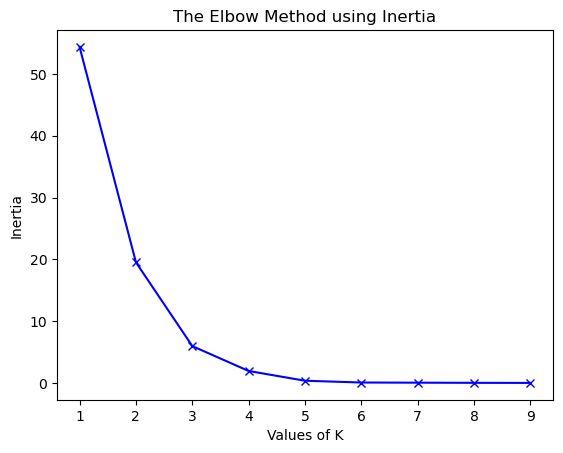

In [7]:
plot_elbow(range(1,10),distortions,inertias)


## Clasification based on 2 clusters number of clusters

,PRED,test_name
0,0,intrate_gcc_v105
0,0,fpspeed_gcc_v110
0,0,intspeed_gcc_v110
0,0,intspeed_gcc_v118
0,0,intspeed_gcc_v105
0,0,intrate_gcc_v110
0,0,intrate_gcc_v118
0,0,fprate_gcc_v118
1,1,fprate_gcc_v110


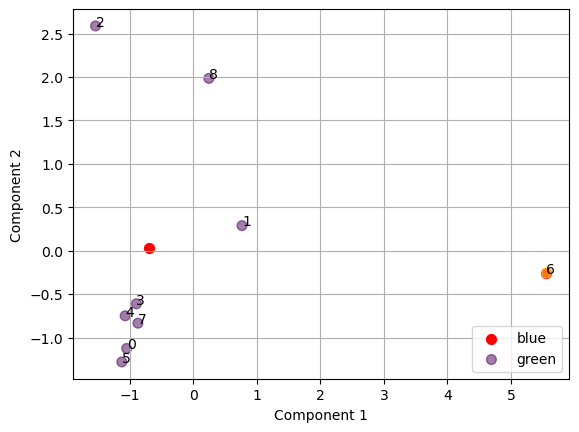

In [8]:
from clustering.clustering import *
df_result,kmeans = kmean_cluster(pca_df,2)
display(df_result)
plot_kmeans(pca_df, kmeans)

# Get the test cases closer to centroid

In [9]:
from sklearn.metrics import pairwise_distances_argmin_min
X = pd.read_csv("pca.csv", usecols = ['principal component 1','principal component 2'])
closest, _ = pairwise_distances_argmin_min(kmeans.cluster_centers_, X)
pca_df = pd.read_csv("pca.csv")
df = pca_df.iloc[closest]
df

,Unnamed: 0,principal component 1,principal component 2,test_name
3,3,-0.898324,-0.611689,intspeed_gcc_v118
6,6,5.559998,-0.256928,fprate_gcc_v110


,test_name,arithmetic,branch,store,load,vector,io,other
3,intspeed_gcc_v118,0.171282,0.281759,0.321231,0.050460,0.001331,0.000032,0.173904
6,fprate_gcc_v110,0.082881,0.141344,0.170890,0.030564,0.103727,0.000016,0.470577


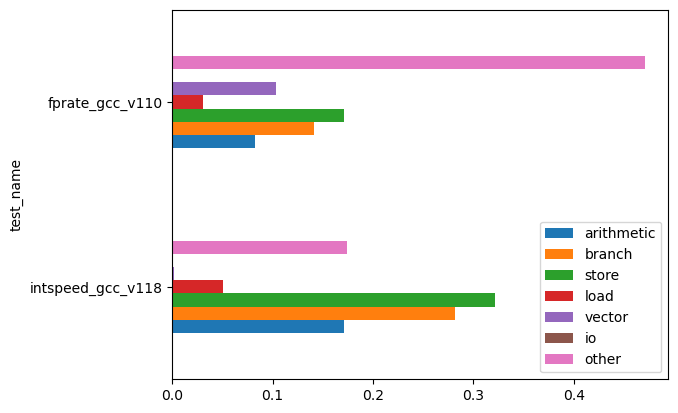

In [10]:
list_tests = df['test_name'].tolist()
df2 = df_global[df_global['test_name'].isin(list_tests)]
df2.plot.barh(x="test_name")
df2

### Automatic label of clusters based cosine similarity to FP/INT


\begin{equation}
\cos ({\bf t},{\bf e})= {{\bf t} {\bf e} \over \|{\bf t}\| \|{\bf e}\|} = \frac{ \sum_{i=1}^{n}{{\bf t}_i{\bf e}_i} }{ \sqrt{\sum_{i=1}^{n}{({\bf t}_i)^2}} \sqrt{\sum_{i=1}^{n}{({\bf e}_i)^2}} }
\end{equation}

In [11]:
x = 0
for test in df_global['test_name']:
    if "int" in test:
        df_global.loc[df_global.index[x], 'Kind'] = int(1)
    else:
        df_global.loc[df_global.index[x], 'Kind'] = int(0)
    x+=1
display(df_global)
df_data = df_global

,test_name,arithmetic,branch,store,load,vector,io,other,Kind
0,intrate_gcc_v105,0.183897,0.280865,0.325338,0.054323,0.016464,0.000012,0.139101,1.0
1,fpspeed_gcc_v110,0.204898,0.203147,0.294539,0.032434,0.002837,0.000121,0.262024,0.0
2,intspeed_gcc_v110,0.105898,0.300718,0.394048,0.049527,0.003753,0.000237,0.145820,1.0
3,intspeed_gcc_v118,0.171282,0.281759,0.321231,0.050460,0.001331,0.000032,0.173904,1.0
4,intspeed_gcc_v105,0.176634,0.283480,0.330749,0.053279,0.015324,0.000035,0.140500,1.0
5,intrate_gcc_v110,0.191304,0.278999,0.309939,0.055921,0.001209,0.000015,0.162614,1.0
6,fprate_gcc_v110,0.082881,0.141344,0.170890,0.030564,0.103727,0.000016,0.470577,0.0
7,intrate_gcc_v118,0.179724,0.279458,0.320783,0.049195,0.002023,0.000016,0.168801,1.0
8,fprate_gcc_v118,0.099880,0.264354,0.372410,0.029058,0.002147,0.000105,0.232047,0.0



A = PRED -> 0
cosine_similarity vs fp_tests 0.40824829046386296
cosine_similarity vs int_tests 0.8660254037844387
cosine_similarity_int > cosine_similarity_fp
Assigining 1 label to pred cluster

B = PRED -> 1
cosine_similarity vs fp_tests 0.5773502691896258
cosine_similarity vs int_tests 0.0
cosine_similarity_fp > cosine_similarity_int
Assigining 0 label to pred cluster
              labels  val_pred  val_true
0  intspeed_gcc_v118         1       1.0
0  intspeed_gcc_v110         1       1.0
0  intspeed_gcc_v105         1       1.0
0   intrate_gcc_v118         1       1.0
0   intrate_gcc_v110         1       1.0
0   intrate_gcc_v105         1       1.0
0   fpspeed_gcc_v110         1       0.0
0    fprate_gcc_v118         1       0.0
1    fprate_gcc_v110         0       0.0
             labels  val_pred  val_true
0  fpspeed_gcc_v110         1       0.0
0   fprate_gcc_v118         1       0.0

adjusted_rand_score 0.2222222222222222

normalized_mutual_info_score 0.27738615628893154

fowlk

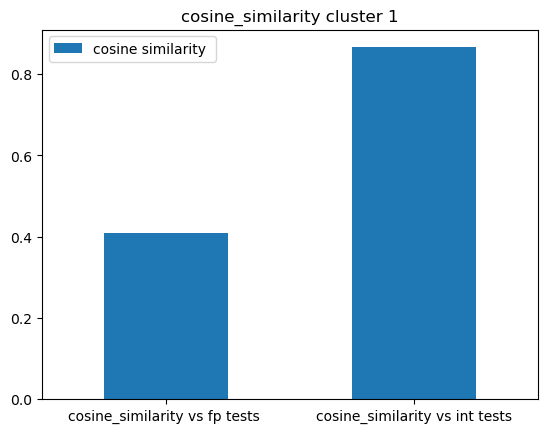

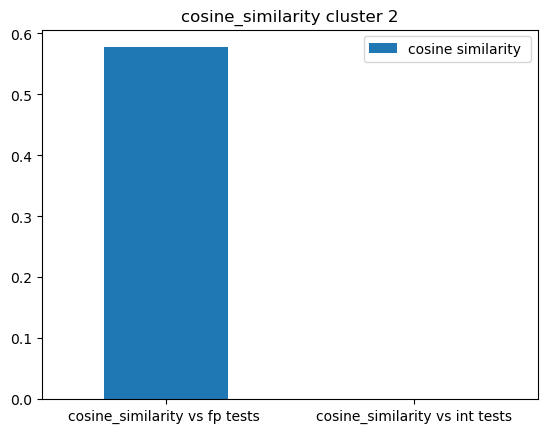

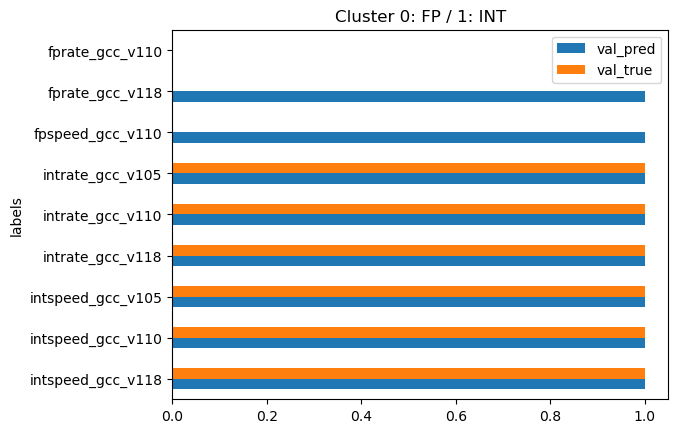

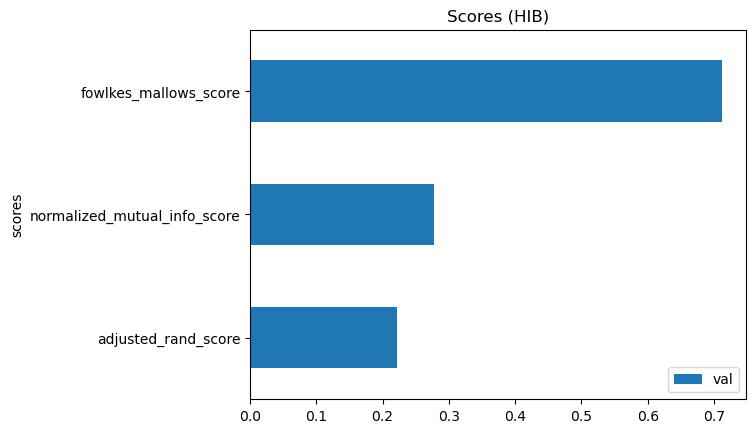

In [12]:
df_sorted = df_data.sort_values(by='Kind')
fp_tests = df_sorted[df_sorted['Kind'] == 0]
int_tests = df_sorted[df_sorted['Kind'] == 1]

df = df_result
df_sorted = df.sort_values(by='PRED')
A = df_sorted[df_sorted['PRED'] == 0]
B = df_sorted[df_sorted['PRED'] == 1]

C = normalize(A,B,fp_tests,int_tests)
C_sorted =  C.sort_values(by='test_name', ascending=False)

REAL_sorted = df_data.sort_values(by='test_name', ascending=False)

labels_pred = C_sorted["PRED"].tolist()
labels_pred_ = [eval(i) for i in labels_pred]
labels_pred = labels_pred_

labels_true = REAL_sorted["Kind"].tolist()

df = pd.DataFrame({'labels':C_sorted['test_name'], 'val_pred':labels_pred, 'val_true':labels_true})

print(df)
print(df.loc[~(df['val_pred'] == df['val_true'])])

ax = df.plot.barh(x='labels', y=['val_pred','val_true'],  rot=0, title= "Cluster 0: FP / 1: INT")


scores_result = scores(labels_true,labels_pred)

df = pd.DataFrame({'scores':['adjusted_rand_score', 'normalized_mutual_info_score', 'fowlkes_mallows_score'], 'val':scores_result[:-1]})
ax = df.plot.barh(x='scores', y='val', rot=0, title= "Scores (HIB)")

## Clasification based on optimal number of clusters

,cluster,test_name,principal component 1,principal component 2
0,0,intrate_gcc_v105,-1.051738,-1.125993
0,0,intrate_gcc_v110,-1.127502,-1.281217
0,0,intrate_gcc_v118,-0.873896,-0.835205
0,0,intspeed_gcc_v105,-1.075194,-0.750206
0,0,intspeed_gcc_v118,-0.898324,-0.611689
1,1,fprate_gcc_v118,0.243125,1.984294
1,1,fpspeed_gcc_v110,0.764839,0.288589
2,2,fprate_gcc_v110,5.559998,-0.256928
3,3,intspeed_gcc_v110,-1.541309,2.588356


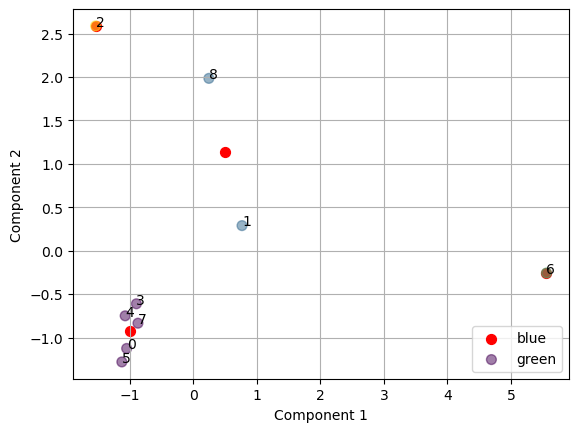

In [13]:
from clustering.clustering import *
df_result,kmeans = kmean_cluster(pca_df,clusters)

# create a DF based on KMEANS prediuction
df_clusters = df_result[['PRED', 'test_name']].copy()
df_clusters.sort_values(by=['test_name'], ascending=True, inplace= True)
pca_df_sorted = pca_df.sort_values(by=['test_name'], ascending=True)
df_clusters["principal component 1"] = pca_df_sorted["principal component 1"].values
df_clusters["principal component 2"] = pca_df_sorted["principal component 2"].values
df_clusters.rename(columns={'PRED': 'cluster'}, inplace=True)
display(df_clusters.sort_values(by='cluster'))
df_clusters.to_csv("clusters.csv")
pca_df.to_csv("pca.csv")
plot_kmeans(pca_df, kmeans)

# Get the test cases closer to centroid

In [14]:
from sklearn.metrics import pairwise_distances_argmin_min
X = pd.read_csv("pca.csv", usecols = ['principal component 1','principal component 2'])
closest, _ = pairwise_distances_argmin_min(kmeans.cluster_centers_, X)
pca_df = pd.read_csv("pca.csv")
df = pca_df.iloc[closest]
df

,Unnamed: 0.1,Unnamed: 0,principal component 1,principal component 2,test_name
7,7,7,-0.873896,-0.835205,intrate_gcc_v118
8,8,8,0.243125,1.984294,fprate_gcc_v118
6,6,6,5.559998,-0.256928,fprate_gcc_v110
2,2,2,-1.541309,2.588356,intspeed_gcc_v110


<AxesSubplot:ylabel='test_name'>

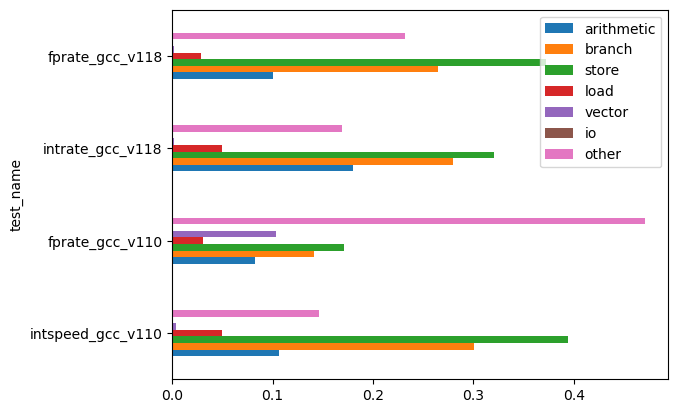

In [15]:
list_tests = df['test_name'].tolist()
df2 = df_global[df_global['test_name'].isin(list_tests)]
df2 = df2.drop(['Kind'], axis=1)
df2.plot.barh(x="test_name")


### Automatic label of clusters based cosine similarity to multiple clusters FP/INT


\begin{equation}
\cos ({\bf t},{\bf e})= {{\bf t} {\bf e} \over \|{\bf t}\| \|{\bf e}\|} = \frac{ \sum_{i=1}^{n}{{\bf t}_i{\bf e}_i} }{ \sqrt{\sum_{i=1}^{n}{({\bf t}_i)^2}} \sqrt{\sum_{i=1}^{n}{({\bf e}_i)^2}} }
\end{equation}

### Create sub dataframes for each cluster

In [16]:
pd.options.mode.chained_assignment = None


def get_cluster_Kind(cluster):
    int_count = 0
    fp_count = 0
    for name in cluster['test_name']:
        if 'int' in name:
            int_count+=1
        else:
            fp_count+=1
    if int_count > fp_count:
        cluster['Kind'] = 1
    elif int_count == fp_count:
        for name_ in df2['test_name']:
            if name in name_:
                if 'int' in name:
                    cluster['Kind'] = 1
                else:
                    cluster['Kind'] = 0
    else:
        cluster['Kind'] = 0
    return cluster

cluster_0 = df_clusters[df_clusters["cluster"] == 0]
cluster_0 = get_cluster_Kind(cluster_0)
cluster_1 = df_clusters[df_clusters["cluster"] == 1]
cluster_1 = get_cluster_Kind(cluster_1)
cluster_2 = df_clusters[df_clusters["cluster"] == 2]
cluster_2 = get_cluster_Kind(cluster_2)
cluster_3 = df_clusters[df_clusters["cluster"] == 3]
cluster_3 = get_cluster_Kind(cluster_3)

df_result = pd.concat([cluster_0, cluster_1,cluster_2,cluster_3], axis=0)
df_result

,cluster,test_name,principal component 1,principal component 2,Kind
0,0,intrate_gcc_v105,-1.051738,-1.125993,1
0,0,intrate_gcc_v110,-1.127502,-1.281217,1
0,0,intrate_gcc_v118,-0.873896,-0.835205,1
0,0,intspeed_gcc_v105,-1.075194,-0.750206,1
0,0,intspeed_gcc_v118,-0.898324,-0.611689,1
1,1,fprate_gcc_v118,0.243125,1.984294,0
1,1,fpspeed_gcc_v110,0.764839,0.288589,0
2,2,fprate_gcc_v110,5.559998,-0.256928,0
3,3,intspeed_gcc_v110,-1.541309,2.588356,1



A = PRED -> 0
cosine_similarity vs fp_tests 1.0000000000000002
cosine_similarity vs int_tests 0.0
cosine_similarity_fp > cosine_similarity_int
Assigining 0 label to pred cluster

B = PRED -> 1
cosine_similarity vs fp_tests 0.0
cosine_similarity vs int_tests 1.0000000000000002
cosine_similarity_int > cosine_similarity_fp
Assigining 1 label to pred cluster
   cluster          test_name  principal component 1  principal component 2  \
0        0  intspeed_gcc_v118              -0.898324              -0.611689   
3        3  intspeed_gcc_v110              -1.541309               2.588356   
0        0  intspeed_gcc_v105              -1.075194              -0.750206   
0        0   intrate_gcc_v118              -0.873896              -0.835205   
0        0   intrate_gcc_v110              -1.127502              -1.281217   
0        0   intrate_gcc_v105              -1.051738              -1.125993   
1        1   fpspeed_gcc_v110               0.764839               0.288589   
1        1

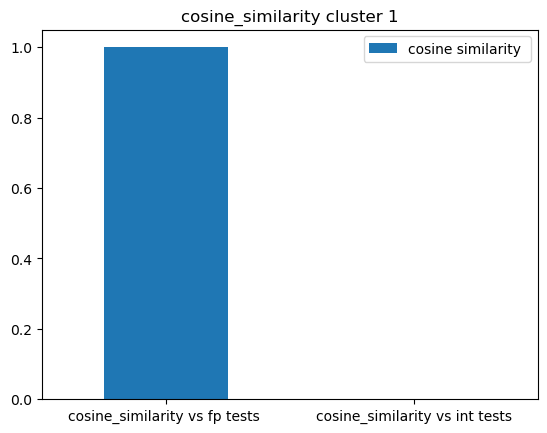

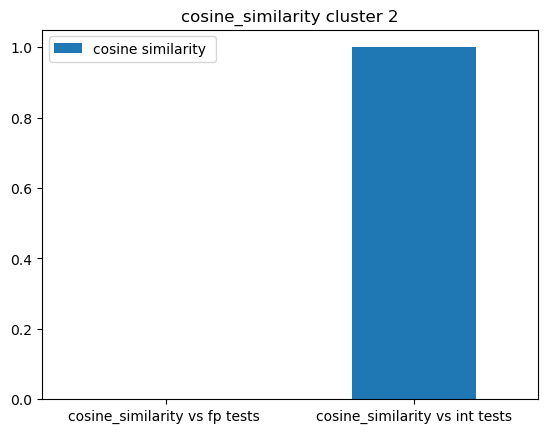

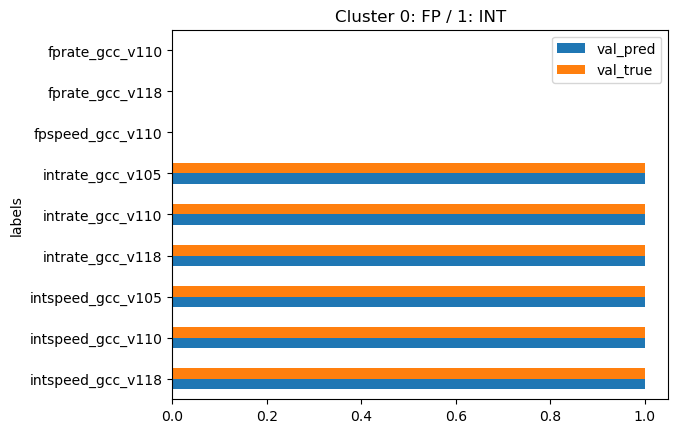

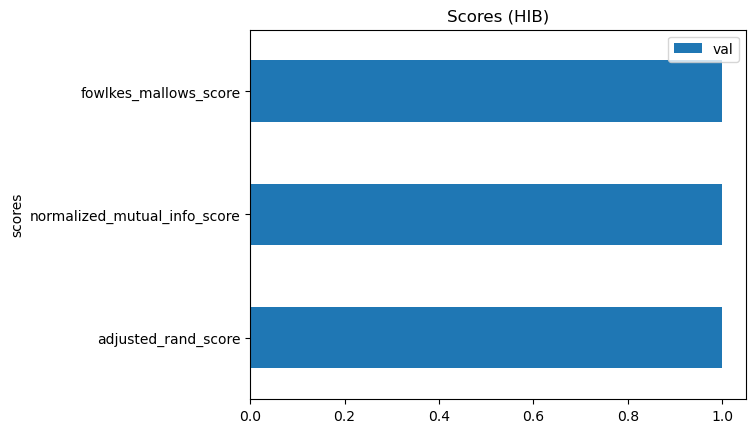

In [17]:
df_sorted = df_data.sort_values(by='Kind')
fp_tests = df_sorted[df_sorted['Kind'] == 0]
int_tests = df_sorted[df_sorted['Kind'] == 1]

df = df_result
df_sorted = df.sort_values(by='Kind')
A = df_sorted[df_sorted['Kind'] == 0]
B = df_sorted[df_sorted['Kind'] == 1]

C = normalize(A,B,fp_tests,int_tests)
C_sorted =  C.sort_values(by='test_name', ascending=False)
print(C_sorted)

REAL_sorted = df_data.sort_values(by='test_name', ascending=False)

labels_pred = C_sorted["Kind"].tolist()
#labels_pred_ = [eval(i) for i in labels_pred]
#labels_pred = labels_pred_

labels_true = REAL_sorted["Kind"].tolist()

df = pd.DataFrame({'labels':C_sorted['test_name'], 'val_pred':labels_pred, 'val_true':labels_true})

print(df)
print(df.loc[~(df['val_pred'] == df['val_true'])])

ax = df.plot.barh(x='labels', y=['val_pred','val_true'],  rot=0, title= "Cluster 0: FP / 1: INT")


scores_result = scores(labels_true,labels_pred)

df = pd.DataFrame({'scores':['adjusted_rand_score', 'normalized_mutual_info_score', 'fowlkes_mallows_score'], 'val':scores_result[:-1]})
ax = df.plot.barh(x='scores', y='val', rot=0, title= "Scores (HIB)")